## DERIVATIVE PRICING
MODULE 3 | LESSON 3


---



# **PRICING EXAMPLE IN THE TRINOMIAL TREE**


|  |  |
|:---|:---|
|**Reading Time** |  60 minutes|
|**Prior Knowledge** | Trinomial model pricing, Matching volatility |
|**Keywords** |Trinomial model, Unique EMM, Completeness, Matching volatility  |


---

*Now that you know the basic intuition regarding pricing in the trinomial tree and the conditions that have to be met (or even imposed) on our end, let's get our hands dirty with a complete example on the trinomial tree.*

*The code for this lesson will guide you on the process of pricing, from scratch, a European call option under a trinomial tree.*

As always, we start importing the necessary libraries:

In [1]:
import numpy as np

In order to give a proper (complete) overview of the pricing process, we will start by considering the **match** between the model parameters ($u$, $m$, and $d$) and the **volatility of the underlying asset.**

The following chunk of code, in essence, revisits the matching volatility concept seen in Module 1. Make sure you understand this properly before proceeding. If you need it, feel free to go back to the notebook from Lesson 1.

## 1. Matching Volatility in the Trinomial Tree

In [2]:
def _gen_stock_vec(nb, h):
    s0 = 100
    sigma = 0.5
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

## 2. Pricing Derivatives in the Trinomial Tree

Once we have properly understood the matching volatility example, we can proceed with our pricing. To check a baseline case, let's price a **European call option** with the following characteristics:

- $S_0 = 100$
- $K=90$
- $\sigma = 30\%$
- $r= 0\%$
- $T=1$
- $N=2$

Here, you have a picture with the evolution of the underlying asset and the call option payoff at each point of the tree. Remember that we proceeded exactly in the same fashion as with the binomial tree:

1- Compute evolution of the underlying.

2- Payoff of the call option at maturity.

3- Calculate risk-neutral probabilities.

4- Expected value (discounted) of call option payoff at each node (backwards induction).


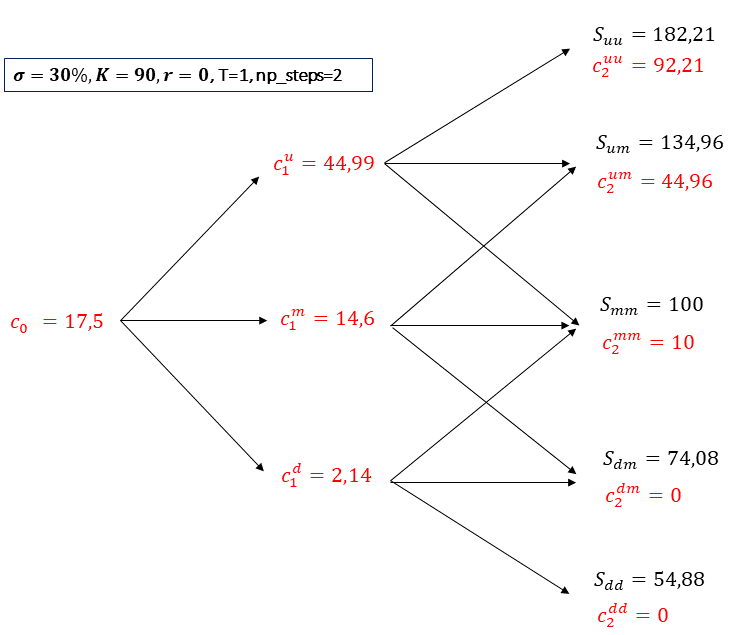<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

As you can see, the novel things in this notebook are more related to the practical implementation of the trinomial model in Python than the purely conceptual part of the pricing process. 

Let's now look at the actual code used for this pricing:

In [3]:
def price(
    nb_steps,
):  # For now, the only input to the function is the number of steps for the tree, N.
    # Define parameters
    r = 0
    sigma = 0.5
    T = 1
    K = 110
    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd
    print(pu, pd, pm)
    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(nb_steps, h)

    # Define Payoff (in this case, European Call Option)
    final_payoff = np.maximum(s - K, 0)
    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp
        # Discount option payoff!
        nxt_vec_prices = discount * expectation

    return nxt_vec_prices[
        0
    ]  # Notice here we only 'return' the expected discounted value of the option at t=0, that is, the price of the call option!

Now, let's check how this code works for different steps in the tree. For starters, let's replicate the solution you have in the picture above, with $N=2$:

In [4]:
print(" Price of the Euro Call Option is ", price(100))

0.24124019455888882 0.25891602289479126 0.49984378254631995
 Price of the Euro Call Option is  16.115031285941384


We can also play around with the **convergence of the price with different time steps**:

In [5]:
N = np.arange(2, 1000, 50)
prices = []
for i in N:
    prices.append(price(i))
    print(" Price of the Euro Call Option is ", price(i))

0.19168941637660364 0.3160424181481997 0.49226816547519664
0.19168941637660364 0.3160424181481997 0.49226816547519664
 Price of the Euro Call Option is  16.302102312180924
0.2378953765567142 0.26240498386857664 0.49969963957470914
0.2378953765567142 0.26240498386857664 0.49969963957470914
 Price of the Euro Call Option is  16.056824212834997
0.24132572062662855 0.25882743436526606 0.49984684500810533
0.24132572062662855 0.25882743436526606 0.49984684500810533
 Price of the Euro Call Option is  16.115423674620974
0.24288264057175957 0.257220141393142 0.49989721803509846
0.24288264057175957 0.257220141393142 0.49989721803509846
 Price of the Euro Call Option is  16.1081609411658
0.24382000999378414 0.256257333514394 0.4999226564918218
0.24382000999378414 0.256257333514394 0.4999226564918218
 Price of the Euro Call Option is  16.09060235975873
0.24446328702641013 0.25559871181621463 0.4999380011573753
0.24446328702641013 0.25559871181621463 0.4999380011573753
 Price of the Euro Call Optio

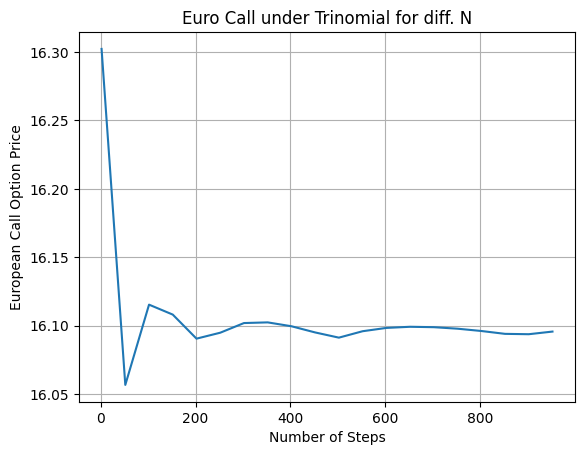

In [6]:
import matplotlib.pyplot as plt

plt.plot(N, prices)
#plt.ylim([10.5, 12])
plt.title("Euro Call under Trinomial for diff. N")
plt.xlabel("Number of Steps")
plt.ylabel("European Call Option Price")
plt.grid(True)
plt.show()

## 3. Conclusion

Now you know how to price a simple option under the trinomial model.

In the next lesson, we will implement an efficient way (using object-oriented programming) to code all these functions.

In the meantime, **we suggest you do two tasks extending this code**. Can you modify this code to price for any N the following options?

**1** - European Put Option with the same characteristics as before $K=110$.

**2** - American Call Option with the same characteristics as before ($K=90$).

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
